In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn import datasets 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load the diabetes dataset
diabetes_dataset = datasets.load_diabetes()

In [21]:
# Initialize lists to store mean squared errors and R^2 scores
mean_squared_errors = []
r2_scores = []
number_of_features = [] 

In [22]:
# Initialize the linear regression model
linear_regression_model = linear_model.LinearRegression()

In [23]:
# Perform analysis for different numbers of features
for num_features in range(0, 10):
    features = diabetes_dataset.data
    
    # Select the appropriate features based on the current number of features
    if num_features == 0:
        features = features[:, 2:3]
    elif num_features == 1:
        features = np.hstack((features[:, 0:num_features], features[:, num_features+1:3]))
    else:
        features = features[:, :num_features+1]
    
    # Split the data into training and test sets
    features_train = features[:-30]
    features_test = features[-30:]
    target_train = diabetes_dataset.target[:-30]
    target_test = diabetes_dataset.target[-30:]
    
    # Train the model
    linear_regression_model.fit(features_train, target_train)
    
    # Make predictions on the test set
    target_pred = linear_regression_model.predict(features_test)
    
    # Evaluate the performance and store the results
    mean_squared_errors.append(mean_squared_error(target_test, target_pred))
    r2_scores.append(r2_score(target_test, target_pred))

In [24]:
# Prepare the number of features list for plotting
number_of_features = list(range(1, 11))

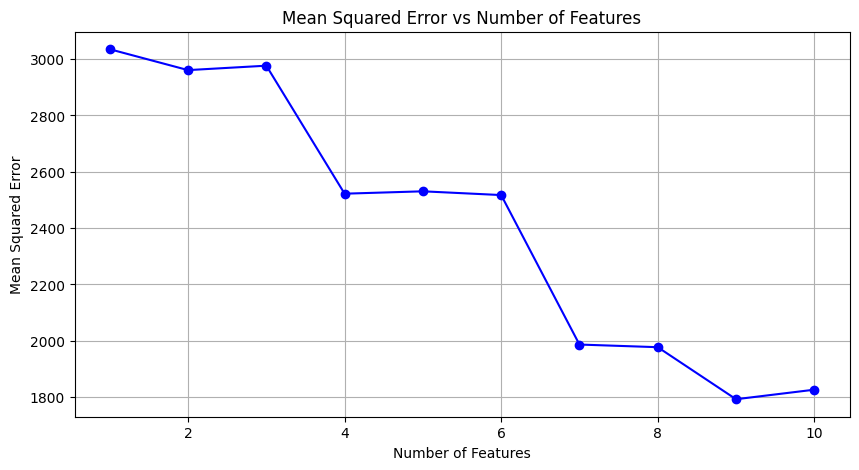

In [25]:
# Plot Mean Squared Error
plt.figure(figsize=(10, 5))
plt.plot(number_of_features, mean_squared_errors, color='blue', marker='o')
plt.title('Mean Squared Error vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.savefig('picture/ans_1.2-1.png')
plt.show()

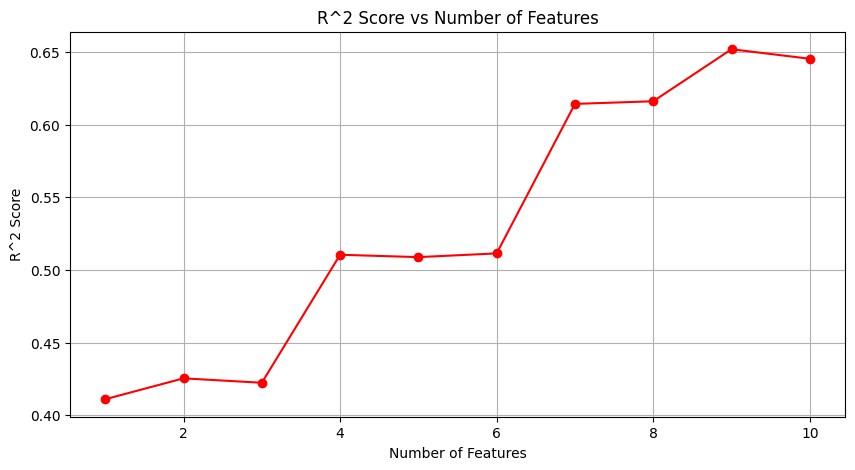

In [26]:
# Plot R^2 Score
plt.figure(figsize=(10, 5))
plt.plot(number_of_features, r2_scores, color='red', marker='o')
plt.title('R^2 Score vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.savefig('picture/ans_1.2-2.png')
plt.show()